In [1]:
# For audio files 
import librosa as lr
from glob import glob

# Lineas algebra
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Data laoding
import pandas as pd

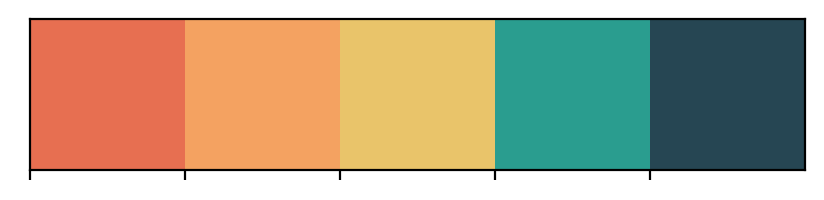

In [2]:
# default settings
plt.rcParams['figure.dpi'] = 200 #high resolution
colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']
colors.reverse()
colors = sns.color_palette(colors)
sns.palplot(colors)
sns.set_palette(colors)

# utilities
def get_unique_count(col):
    return setA_df[col].nunique()

In [3]:
# List all the wave files in the folder
data_dir = '../input/heartbeat-sounds/set_a'
audio_files = glob(data_dir + '/*.wav')

# Read one audio file, create the time array
audio, audio_sfreq = lr.load(audio_files[20])
time = np.arange(0, len(audio)) / sfreq

NameError: name 'sfreq' is not defined

# Exploring the data
Each audio file shows the sound amplitude of a person's heartbeat thruogh time. This is a special kind of time series since it shows data from every second of the heartbeat. This data is important for diagnosis. 

In [ ]:
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.set_title('Heartbeat of person through time')
plt.show()

# Normal vs Abnormal
How does the data differ in an abnormal patient?

In [ ]:
setA_df = pd.read_csv('../input/heartbeat-sounds/set_a.csv')
setA_df.head(5)

In [ ]:
# labels in the data 
set(setA_df['label'].values)

In [ ]:
# Extracting the normal and abnormal heartbeat sounds
normal = audio_files = glob(data_dir + '/normal__2011*.wav')
abnormal = audio_files = glob(data_dir + '/murmur*.wav')

# The lengths are the same 
#assert len(normal) == len(abnormal)

# Calculate the time array 
time = np.arange(0, len(normal)) / sfreq

# Read one audio file, create the time array
normal_audio, sfreq = lr.load(normal[0])
abnormal_audio, sfreq = lr.load(abnormal[0])

# Calculate the time array 
time = np.arange(0, len(normal_audio)) / sfreq

# Visualize the data 
fig2, ax2 = plt.subplots(2,1)
ax2[0].plot(time, normal_audio)
ax2[0].set_xlabel('time')
ax2[0].set_ylabel('heartbeat')
ax2[0].set_title('normal')
ax2[1].plot(time, abnormal_audio)
ax2[1].set_xlabel('time')
ax2[1].set_ylabel('heartbeat')
ax2[1].set_title('abnormal')

fig.tight_layout()
plt.show()

# The auditory envelope

Smoothing the data helps us calculate the auditory envelope related to the total amount of audio energy present at each moment of time. 

In [ ]:
# Make a series of data points 
audio = pd.Series(normal_audio, index=time)

# Plot the raw data first
raw_plot = audio.plot(figsize=(10, 5))
raw_plot.set_title('Raw data')
plt.show()

# Rectifying the audio

In [ ]:
# Rectify the audio signal
audio_rectified = audio.apply(np.abs)

# Plot the result
rectified_plot = audio_rectified.plot(figsize=(10, 5))
rectified_plot.set_title('Rectified audio')
plt.show()

# Smoothening the data and removing the noise

In [ ]:
# Smooth by applying a rolling mean
audio_rectified_smooth = audio_rectified.rolling(50).mean()

# Plot the result
audio_rectified_smooth.plot(figsize=(10, 5))
plt.show()

By rectifying the signal and cleaning up all the noise, we now have a better understanding of the data and can draw insights from it🙂

# Derivative features: The tempogram 
Auditory data has a set of features that can help us extract valuable data from it. We can get the tempogram of an audio to compute the rythm and tempo of it.
These features can help us and the model get a better sense of the data we're dealing with. 

In [ ]:
normal_series = pd.Series(normal_audio, time)
abnormal_series = pd.Series(abnormal_audio, time)
audio_df = pd.concat([normal_series, abnormal_series], axis=1)

audio_df.head(5)

In [ ]:
audio_tempo = lr.beat.tempo(normal_audio, sr=sfreq, hop_length=2**6, aggregate=None)

# Spectograms
In the field of audio engineering, spectograms are used to describe the presense spectral content (low pitch etc.) over time. Spectral analysis is commen in other forms of time series as well. 

In [ ]:
# Import the stft function
from librosa.core import stft
from librosa.core import amplitude_to_db
from librosa.display import specshow

# Prepare the STFT
HOP_LENGTH = 2**4
spec = stft(normal_audio, hop_length=HOP_LENGTH, n_fft=2**7)

# Convert into decibels
spec_db = amplitude_to_db(np.abs(spec))

# Compare the raw audio to the spectrogram of the audio
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].plot(time, normal_audio)
specshow(spec_db, sr=sfreq, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH)
plt.show()

We can see that heartbeat sounds come in pairs. This is proven by the biology literature. The heart has two sounds in total one in R and the other in the near end of T wave in the elctrogram. 

![ECG](https://meetjegezondheid.nl/wp-content/uploads/2020/09/normaal-ecg-hartslag.jpg)